[2982, 425, 105, 88]
[0.6877022653721683, 0.16990291262135923, 0.1423948220064725]


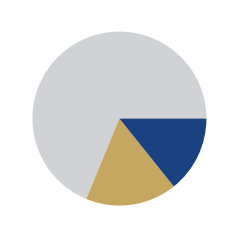

In [40]:
from PIL import Image
import numpy
import math
import time
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import glob
from tqdm import tqdm

file = "pokemon-images/images/absol.png"

imgfile = Image.open(file)
numarray = numpy.array(imgfile.getdata(), numpy.uint8)
cluster_count = 4

mclusters = MiniBatchKMeans(n_clusters = cluster_count)
mclusters.fit(numarray.reshape(-4, 4))

npbins = numpy.arange(0, cluster_count+1)
histogram = numpy.histogram(mclusters.labels_, bins=npbins)
labels = numpy.unique(mclusters.labels_)

npbins = numpy.arange(0, cluster_count + 1)
histogram = numpy.histogram(mclusters.labels_, bins=npbins)
Histsorted = sorted(histogram[0] ,reverse=True)
labels = numpy.unique(mclusters.labels_)

couleurs = mclusters.cluster_centers_[1:].tolist()
    
print(Histsorted)

#Calcul des coefficients de couleur

couleur_percentage = [Histsorted[i] / sum(Histsorted[1:]) for i in range(1, len(Histsorted))]
print(couleur_percentage)

fig1, ax1 = plot.subplots()
pieColor = []
for i in range(cluster_count-1):
    pieColor.append('#%02x%02x%02x' % (math.ceil(couleurs[i][0]),
        math.ceil(couleurs[i][1]), math.ceil(couleurs[i][2])))

pieList = plot.pie(Histsorted[1:], colors=pieColor)


  
plot.show()



In [66]:
from PIL import Image
import numpy
import math
import time
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import glob
from tqdm import tqdm_notebook as tqdm


data = []
images = glob.glob("pokemon-images/images/*png")


for imgName in tqdm(images):
    imgfile = Image.open(imgName)
    numarray = numpy.array(imgfile.getdata(), numpy.uint8)
    cluster_count = 4

    mclusters = MiniBatchKMeans(n_clusters = cluster_count)
    mclusters.fit(numarray.reshape(-4, 4))

    npbins = numpy.arange(0, cluster_count+1)
    histogram = numpy.histogram(mclusters.labels_, bins=npbins)
    labels = numpy.unique(mclusters.labels_)

    npbins = numpy.arange(0, cluster_count + 1)
    histogram = numpy.histogram(mclusters.labels_, bins=npbins)
    Histsorted = sorted(histogram[0] ,reverse=True)
    labels = numpy.unique(mclusters.labels_)

    couleurs = mclusters.cluster_centers_[1:].tolist()
    
    #Calcul des coefficients des couleurs 
    couleur_percentage = [Histsorted[i] / sum(Histsorted[1:]) for i in range(1, len(Histsorted))]

    #Calcul de la taille
    compteur = 0
    for i in range(imgfile.size[0]):
        for j in range(imgfile.size[1]):
            if imgfile.getpixel((i,j)) == (0,0,0,0):
                compteur += 1

    compteur = imgfile.size[0]*imgfile.size[1] - compteur

    imagedata = []
    imagedata.append(couleurs[0])
    imagedata.append(couleurs[1])
    imagedata.append(couleurs[2])
    imagedata.append(compteur)
    imagedata.append(imgName)
    imagedata.append(couleur_percentage[0])
    imagedata.append(couleur_percentage[1])
    imagedata.append(couleur_percentage[2])

    data.append(imagedata)
    


print("done")





done


In [68]:
import csv


with open('data.csv', 'w', newline='') as csvfile:
    fieldnames = ["Nom", "Couleur1.1","Couleur1.2","Couleur1.3", "Percentage1", "Couleur2.1","Couleur2.2","Couleur2.3","Percentage2", "Couleur3.1", "Couleur3.2", "Couleur3.3", "Percentage3", "Taille"]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    
    for i in tqdm(data):
        writer.writerow({'Nom': i[4],
                        'Couleur1.1': i[0][0], 
                         'Couleur1.2': i[0][1],
                        'Couleur1.3' : i[0][2],
                         'Percentage1': i[5],
                        'Couleur2.1': i[1][0],
                        'Couleur2.2': i[1][1],
                        'Couleur2.3': i[1][2],
                        'Percentage2': i[6],
                        'Couleur3.1': i[2][0],
                        'Couleur3.2': i[2][1],
                        'Couleur3.3': i[2][2],
                        'Percentage3': i[7],
                        'Taille': i[3]})
        
print("done")

 

done


Select your favorite Pokemon absol
Searching the Pokemon


processing data


['pokemon-images/images\\abomasnow.png', '244.63973063973063', '246.986531986532', '248.87542087542087', '0.5768875761491601', '110.19680851063829', '147.0159574468085', '142.39361702127664', '0.378438249953849', '184.22222222222223', '187.94444444444446', '187.94444444444446', '0.04467417389699095', '5423']
['pokemon-images/images\\abra.png', '0.0', '0.0', '0.0', '0.5587548638132296', '195.0', '191.73333333333332', '183.73333333333332', '0.33073929961089493', '131.84444444444443', '115.97777777777777', '57.37777777777778', '0.11050583657587548', '1285']
['pokemon-images/images\\accelgor.png', '242.40740740740742', '115.01234567901234', '140.19753086419755', '0.6488907849829352', '182.57142857142858', '182.57142857142858', '184.67857142857142', '0.2687713310580205', '109.20370370370371', '117.08641975308642', '134.58641975308643', '0.08233788395904437', '2348']
['pokemon-images/images\\aegislash-blade.png', '160.52995780590712', '147.6118143459917', '117.51139240506329', '0.40042750267

['pokemon-images/images\\avalugg.png', '105.94610778443113', '143.21556886227546', '172.74251497005986', '0.5916461916461917', '157.18957345971563', '214.87203791469193', '241.2227488151659', '0.35405405405405405', '190.2', '191.13333333333333', '193.73333333333332', '0.054299754299754296', '4070']
['pokemon-images/images\\axew.png', '95.2280701754386', '105.15789473684211', '110.80701754385964', '0.5127388535031847', '169.03571428571428', '180.21428571428575', '176.14285714285714', '0.32802547770700635', '89.34615384615384', '125.11538461538461', '160.15384615384616', '0.1592356687898089', '14400']
['pokemon-images/images\\azelf.png', '126.57142857142857', '186.1904761904762', '206.96825396825398', '0.45174050632911394', '120.24', '125.68', '127.68', '0.29193037974683544', '217.88571428571427', '228.14285714285714', '235.94285714285715', '0.2563291139240506', '1264']
['pokemon-images/images\\azumarill.png', '193.03977272727272', '195.1590909090909', '195.5473484848485', '0.62979031091

['pokemon-images/images\\blitzle.png', '123.14588859416446', '133.62864721485403', '134.83819628647214', '0.6196868008948546', '1.3166666666666667', '24.316666666666666', '96.04166666666667', '0.19239373601789708', '129.66055045871562', '77.44036697247707', '16.155963302752294', '0.18791946308724833', '14400']
['pokemon-images/images\\boldore.png', '39.473844978999615', '48.458953799159985', '77.32226040473466', '0.7274057811928284', '177.56980056980055', '83.98860398860401', '46.05982905982906', '0.20453713867544823', '188.58893280632412', '188.2094861660079', '180.01581027667984', '0.06805708013172337', '2733']
['pokemon-images/images\\bonsly.png', '191.70484581497792', '154.10572687224663', '86.01762114537448', '0.5889830508474576', '83.6580796252927', '130.8290398126464', '88.03278688524588', '0.30338983050847457', '193.39583333333334', '193.875', '196.04166666666666', '0.10762711864406779', '1180']
['pokemon-images/images\\bouffalant.png', '105.24514991181658', '85.90299823633157'

['pokemon-images/images\\chansey.png', '146.66666666666666', '141.18390804597698', '127.70114942528735', '0.5966101694915255', '178.61379310344827', '179.55862068965519', '183.17241379310346', '0.3305084745762712', '10.333333333333334', '64.08333333333333', '136.41666666666666', '0.07288135593220339', '14400']
['pokemon-images/images\\charizard.png', '30.60927152317881', '134.13718070009455', '149.00473036896884', '0.6125641652407724', '224.78205128205127', '174.92032967032964', '111.60302197802197', '0.302371058420924', '211.35962145110406', '210.41955835962142', '209.4668769716089', '0.08506477633830359', '4091']
['pokemon-images/images\\charmander.png', '242.29885057471265', '200.67816091954023', '141.4712643678161', '0.621464829586657', '163.90322580645162', '112.3225806451613', '68.48387096774194', '0.27991298042059465', '184.0', '185.2', '186.53333333333333', '0.09862218999274837', '1379']
['pokemon-images/images\\charmeleon.png', '243.35526315789474', '177.14473684210526', '152.

['pokemon-images/images\\corphish.png', '171.29166666666666', '164.91666666666666', '163.58333333333331', '0.623875224955009', '228.72727272727272', '217.3939393939394', '203.4848484848485', '0.2501499700059988', '220.10204081632654', '113.09183673469387', '77.34693877551021', '0.1259748050389922', '1667']
['pokemon-images/images\\corsola.png', '0.6616886846639862', '0.2205628948879954', '0.1418724870763929', '0.7336065573770492', '190.3556701030928', '200.93298969072166', '201.2577319587629', '0.13934426229508196', '10.333333333333334', '45.75757575757576', '115.81818181818181', '0.12704918032786885', '14400']
['pokemon-images/images\\cottonee.png', '228.5392156862745', '243.5392156862745', '221.5392156862745', '0.5345581802274716', '133.4791666666667', '192.91145833333334', '128.6979166666667', '0.4654418197725284', '0.0', '0.0', '0.0', '0.0', '1143']
['pokemon-images/images\\cradily.png', '134.73308270676694', '144.61654135338347', '114.45488721804512', '0.45454545454545453', '229.8

['pokemon-images/images\\dialga.png', '57.633074935400515', '83.99095607235141', '120.84754521963825', '0.5154661016949152', '201.67307692307693', '217.6048951048951', '224.44055944055944', '0.3889830508474576', '176.75657894736844', '179.89473684210526', '180.55263157894734', '0.09555084745762712', '4722']
['pokemon-images/images\\diancie.png', '116.97297297297297', '98.90090090090091', '121.56756756756756', '0.4965034965034965', '240.13684210526316', '193.96842105263158', '222.25263157894736', '0.43403263403263403', '191.53846153846155', '186.30769230769232', '187.6153846153846', '0.06946386946386947', '2145']
['pokemon-images/images\\diggersby.png', '193.91954022988506', '182.7816091954023', '166.17241379310343', '0.5557074504442926', '122.3740157480315', '97.41338582677166', '62.99212598425198', '0.38118022328548645', '187.88888888888889', '188.83333333333334', '186.77777777777777', '0.06311232627022101', '4389']
['pokemon-images/images\\diglett.png', '71.81481481481481', '77.66666

['pokemon-images/images\\dustox.png', '103.39732142857144', '111.45089285714286', '55.60267857142857', '0.43222604047346314', '208.6341463414634', '174.9512195121951', '196.10975609756093', '0.33753340969835816', '167.40304182509502', '174.7110266159696', '99.57794676806084', '0.23024054982817868', '2619']
['pokemon-images/images\\dwebble.png', '129.9175257731959', '123.15463917525773', '116.08247422680412', '0.5', '166.1159420289855', '178.30434782608697', '177.91304347826087', '0.39572192513368987', '14.095238095238095', '44.61904761904762', '136.0952380952381', '0.10427807486631016', '14400']
['pokemon-images/images\\eelektrik.png', '58.84615384615385', '74.86538461538461', '99.0576923076923', '0.46987951807228917', '206.35897435897436', '173.42307692307693', '130.29487179487182', '0.43775100401606426', '188.4375', '189.4375', '190.4375', '0.09236947791164658', '1494']
['pokemon-images/images\\eelektross.png', '0.0', '0.0', '0.0', '0.5753835890593729', '197.2630744849445', '168.9461

['pokemon-images/images\\ferroseed.png', '221.3780487804878', '222.0121951219512', '224.3048780487805', '0.3912319644839068', '53.25', '78.5', '45.25', '0.31687014428412874', '127.14285714285714', '157.92857142857142', '130.92857142857142', '0.29189789123196447', '1802']
['pokemon-images/images\\ferrothorn.png', '0.15714285714285714', '0.29523809523809524', '0.20476190476190476', '0.4918575765939829', '63.844444444444434', '91.4', '63.84444444444444', '0.291471156500138', '226.87012987012986', '234.53246753246754', '230.5194805194805', '0.2166712669058791', '3634']
['pokemon-images/images\\finneon.png', '55.94117647058823', '73.8529411764706', '79.8529411764706', '0.5330535152151101', '174.6290322580645', '186.38709677419354', '193.25806451612902', '0.37355718782791186', '187.14285714285714', '189.57142857142858', '189.57142857142858', '0.09338929695697797', '953']
['pokemon-images/images\\flaaffy.png', '237.77027027027026', '209.05405405405406', '225.13513513513513', '0.72027972027972

['pokemon-images/images\\gastly.png', '91.47272727272727', '86.76363636363637', '80.12727272727271', '0.6119402985074627', '137.33333333333334', '136.7142857142857', '130.02380952380958', '0.23582089552238805', '30.83783783783784', '62.24324324324324', '104.54054054054053', '0.15223880597014924', '14400']
['pokemon-images/images\\gastrodon.png', '140.421301775148', '105.7810650887574', '62.65088757396448', '0.5193256578947368', '193.79674796747966', '192.04065040650408', '194.0650406504065', '0.4231085526315789', '221.18848167539267', '155.32565445026174', '160.1717277486911', '0.05756578947368421', '2432']
['pokemon-images/images\\genesect.png', '121.1271676300578', '93.53179190751445', '117.09826589595376', '0.5739878179863848', '180.13793103448276', '181.0344827586207', '179.72413793103448', '0.33679684700824075', '221.66666666666666', '189.70666666666668', '226.42666666666668', '0.08921533500537442', '2791']
['pokemon-images/images\\gengar.png', '0.5082393755420641', '0.21682567215

['pokemon-images/images\\gothorita.png', '111.04968944099379', '112.03105590062111', '98.75776397515529', '0.6782608695652174', '192.07142857142858', '200.78571428571428', '186.8095238095238', '0.23304347826086957', '5.193548387096774', '27.548387096774185', '114.38709677419355', '0.08869565217391304', '14400']
['pokemon-images/images\\gourgeist-average.png', '241.64406779661016', '180.16949152542372', '140.0225988700565', '0.5042372881355932', '103.89308176100629', '80.15723270440252', '65.08176100628931', '0.4256120527306968', '196.70833333333334', '194.95833333333334', '194.875', '0.07015065913370998', '2124']
['pokemon-images/images\\granbull.png', '1.7823315118397085', '0.4444444444444444', '0.1575591985428051', '0.7407407407407407', '200.00943396226415', '205.21226415094338', '207.6556603773585', '0.13793103448275862', '183.35849056603777', '163.0', '114.0754716981132', '0.12132822477650064', '14400']
['pokemon-images/images\\graveler.png', '0.9319186560565871', '0.53227232537577

['pokemon-images/images\\hitmonchan.png', '214.30434782608697', '197.1014492753623', '196.57971014492753', '0.4789272030651341', '139.23287671232876', '108.73972602739725', '101.28767123287672', '0.4335887611749681', '216.16666666666666', '216.16666666666666', '216.16666666666666', '0.08748403575989783', '1566']
['pokemon-images/images\\hitmonlee.png', '139.65714285714284', '142.0685714285714', '146.88', '0.7440758293838863', '8.851851851851851', '27.925925925925927', '78.11111111111111', '0.12796208530805686', '149.5757575757576', '129.45454545454547', '70.27272727272727', '0.12796208530805686', '14400']
['pokemon-images/images\\hitmontop.png', '211.5164609053498', '173.93827160493828', '141.6213991769547', '0.5490830636461704', '105.60857908847186', '112.02680965147454', '122.38069705093834', '0.37648327939590076', '186.02857142857144', '189.2', '191.54285714285714', '0.0744336569579288', '1854']
['pokemon-images/images\\ho-oh.png', '0.0', '0.0', '0.0', '0.4423897581792319', '209.784

['pokemon-images/images\\kabuto.png', '210.27397260273972', '162.5068493150685', '124.32876712328768', '0.6213953488372093', '192.71428571428572', '195.07142857142858', '197.64285714285714', '0.2986046511627907', '79.0232558139535', '64.81395348837209', '45.44186046511627', '0.08', '1075']
['pokemon-images/images\\kabutops.png', '224.21518987341773', '180.53164556962025', '122.86075949367088', '0.5463013698630137', '121.08450704225352', '91.36619718309859', '56.19718309859155', '0.3358904109589041', '184.63636363636363', '186.95454545454547', '189.45454545454547', '0.1178082191780822', '1825']
['pokemon-images/images\\kadabra.png', '0.0', '0.0', '0.0', '0.48127490039840637', '131.35426540284362', '111.88507109004739', '74.11966824644547', '0.4059760956175299', '189.7246376811594', '189.45893719806767', '187.33333333333334', '0.11274900398406375', '2510']
['pokemon-images/images\\kakuna.png', '0.16720674011665587', '0.04147764095917045', '0.08230719377835385', '0.6348684210526315', '160

['pokemon-images/images\\lapras.png', '92.46636771300449', '171.97757847533632', '207.65470852017938', '0.5094205474582296', '233.02659574468086', '227.14893617021278', '212.4095744680851', '0.4134376110913615', '180.69565217391303', '179.08695652173913', '179.7826086956522', '0.07714184145040881', '2815']
['pokemon-images/images\\larvesta.png', '245.19122257053291', '241.4639498432602', '240.3448275862069', '0.5937803692905733', '143.6210045662101', '95.2260273972603', '83.14840182648399', '0.4062196307094266', '0.0', '0.0', '0.0', '0.0', '2058']
['pokemon-images/images\\larvitar.png', '155.09821428571428', '155.2410714285714', '155.02678571428572', '0.6815286624203821', '12.272727272727273', '46.77272727272727', '136.9090909090909', '0.17197452229299362', '167.0', '129.72727272727272', '88.0909090909091', '0.1464968152866242', '14400']
['pokemon-images/images\\latias.png', '160.32954545454547', '88.47727272727273', '98.32954545454545', '0.5341317365269461', '199.98181818181817', '195

['pokemon-images/images\\luvdisc.png', '101.96428571428571', '102.16071428571429', '102.64285714285714', '0.6729857819905213', '56.611111111111114', '75.5', '82.88888888888889', '0.23222748815165878', '79.6', '14.6', '2.0', '0.0947867298578199', '14400']
['pokemon-images/images\\luxio.png', '0.0', '0.0', '0.0', '0.5846213292117465', '76.57575757575758', '71.59090909090911', '54.24747474747475', '0.348145285935085', '205.72727272727272', '205.0', '200.5909090909091', '0.06723338485316847', '2588']
['pokemon-images/images\\luxray.png', '0.0', '0.0', '0.0', '0.7659574468085106', '67.18413320274239', '62.44172380019589', '58.89422135161606', '0.16825307950727883', '144.54708520179375', '160.60538116591928', '136.21076233183862', '0.06578947368421052', '3572']
['pokemon-images/images\\machamp.png', '171.90062111801242', '187.7391304347826', '207.583850931677', '0.4944527736131934', '109.18589743589743', '111.57692307692308', '121.49358974358974', '0.4272863568215892', '188.55555555555554', 

['pokemon-images/images\\masquerain.png', '238.80519480519482', '238.28138528138527', '236.95670995670994', '0.5047003525264395', '200.76214833759587', '150.54219948849112', '133.02301790281336', '0.2984723854289072', '201.51388888888889', '205.89583333333334', '207.92361111111111', '0.19682726204465334', '1703']
['pokemon-images/images\\mawile.png', '86.85427135678394', '86.26130653266331', '81.39195979899496', '0.6864235055724417', '233.24', '222.36', '160.8', '0.22695035460992907', '196.58620689655172', '196.58620689655172', '196.48275862068965', '0.08662613981762918', '1988']
['pokemon-images/images\\medicham.png', '210.9344262295082', '112.00819672131148', '136.0737704918033', '0.6698979591836735', '222.13793103448276', '213.93103448275863', '202.20689655172413', '0.2173469387755102', '182.38095238095238', '184.8095238095238', '184.71428571428572', '0.11275510204081633', '1962']
['pokemon-images/images\\meditite.png', '226.44262295081967', '224.27868852459017', '222.80327868852459

['pokemon-images/images\\mr-mime.png', '30.146551724137932', '72.12931034482759', '104.92241379310344', '0.38728070175438595', '228.3', '217.56470588235294', '220.95882352941177', '0.3570175438596491', '176.6056338028169', '131.95070422535213', '143.42957746478874', '0.25570175438596493', '2280']
['pokemon-images/images\\mudkip.png', '0.0', '0.0', '0.0', '0.5219298245614035', '209.40983606557376', '235.60655737704917', '247.80327868852459', '0.3092105263157895', '208.02631578947367', '154.78947368421052', '74.6842105263158', '0.16885964912280702', '1371']
['pokemon-images/images\\muk.png', '0.5814850530376084', '0.14754098360655737', '0.2700096432015429', '0.5956043956043956', '109.66666666666667', '66.16666666666667', '30.666666666666668', '0.3362637362637363', '111.9281045751634', '123.01307189542484', '128.45098039215685', '0.06813186813186813', '14400']
['pokemon-images/images\\munchlax.png', '156.93449781659388', '152.94323144104803', '144.12663755458516', '0.723404255319149', '6.

['pokemon-images/images\\oshawott.png', '0.0', '0.0', '0.0', '0.5134907251264755', '227.8', '238.0', '236.43076923076924', '0.3971332209106239', '95.27272727272727', '117.9090909090909', '127.72727272727273', '0.0893760539629005', '1186']
['pokemon-images/images\\pachirisu.png', '175.77777777777777', '185.6060606060606', '190.68686868686868', '0.4482758620689655', '142.31304347826085', '138.62608695652173', '128.3304347826087', '0.43260188087774293', '2.34375', '51.46875', '135.84375', '0.11912225705329153', '14400']
['pokemon-images/images\\palkia.png', '185.06368221941992', '173.73266078184125', '184.93316519546025', '0.38189194172966995', '110.02166586422724', '85.91237361579199', '110.3562831006259', '0.36732435921076895', '247.3545183714002', '244.91923204237008', '247.86163522012578', '0.2507836990595611', '5427']
['pokemon-images/images\\palpitoad.png', '82.55335968379447', '78.39525691699605', '76.70750988142292', '0.40276453765490944', '75.10780669144982', '140.5204460966542',

['pokemon-images/images\\pineco.png', '139.34810126582278', '144.05696202531647', '145.94936708860763', '0.46444444444444444', '111.3625', '111.7875', '106.43125', '0.45111111111111113', '1.6296296296296295', '22.51851851851852', '64.48148148148148', '0.08444444444444445', '14400']
['pokemon-images/images\\pinsir.png', '162.21893491124263', '165.76923076923077', '165.698224852071', '0.6697819314641744', '13.0', '49.80555555555556', '122.52777777777777', '0.17445482866043613', '162.0857142857143', '109.2', '36.25714285714286', '0.1557632398753894', '14400']
['pokemon-images/images\\piplup.png', '159.16133518776073', '177.68428372739922', '159.67872044506254', '0.39412866958151155', '231.3815789473684', '245.95230263157896', '246.59703947368422', '0.3179262960649594', '53.39688715953307', '113.70428015564202', '169.75226977950723', '0.28794503435352903', '1601']
['pokemon-images/images\\plusle.png', '199.29032258064515', '101.11290322580645', '102.48387096774194', '0.4979218620116376', '

['pokemon-images/images\\raikou.png', '243.26190476190476', '224.4404761904762', '60.714285714285715', '0.39154160982264663', '238.94117647058823', '232.31764705882352', '237.72941176470587', '0.3120736698499318', '153.54954954954954', '137.75675675675674', '132.07207207207207', '0.2963847203274216', '2932']
['pokemon-images/images\\ralts.png', '129.97058823529412', '136.5', '113.94117647058823', '0.44371584699453553', '249.33333333333334', '249.96296296296296', '251.22222222222223', '0.28087431693989073', '177.51063829787233', '213.68085106382978', '173.53191489361703', '0.2754098360655738', '915']
['pokemon-images/images\\rampardos.png', '80.4755244755245', '79.16783216783217', '80.83216783216783', '0.49567243675099865', '224.62295081967213', '224.0655737704918', '222.95081967213116', '0.3671770972037284', '109.89528795811518', '130.0104712041885', '151.81675392670158', '0.13715046604527298', '3004']
['pokemon-images/images\\rapidash.png', '244.6241134751773', '238.7163120567376', '1

['pokemon-images/images\\sandshrew.png', '225.72115384615384', '202.82692307692307', '112.26923076923077', '0.5326514555468135', '140.09756097560975', '123.46341463414635', '73.70731707317071', '0.2619984264358773', '240.5', '235.14814814814815', '212.12962962962962', '0.2053501180173092', '1271']
['pokemon-images/images\\sandslash.png', '138.64242424242423', '101.96363636363637', '43.03030303030303', '0.4692502106149958', '188.0', '187.8421052631579', '191.10526315789474', '0.46040438079191237', '237.84126984126985', '225.29365079365078', '159.31746031746033', '0.07034540859309182', '2374']
['pokemon-images/images\\sawk.png', '90.09565217391304', '131.79999999999998', '160.19130434782608', '0.3908141962421712', '43.470588235294116', '48.220588235294116', '55.720588235294116', '0.3198329853862213', '191.06172839506172', '224.22222222222223', '225.22222222222223', '0.28935281837160753', '2395']
['pokemon-images/images\\sawsbuck.png', '171.93203883495147', '135.80582524271844', '84.31067

['pokemon-images/images\\shellos.png', '222.33195020746888', '189.24481327800834', '197.21576763485479', '0.5679389312977099', '186.36686390532543', '119.17159763313609', '124.70414201183432', '0.43206106870229005', '2.0098039215686274', '2.156862745098039', '2.156862745098039', '0.0', '1310']
['pokemon-images/images\\shelmet.png', '177.5497630331754', '178.41469194312796', '172.0900473933649', '0.5732484076433121', '72.87150837988825', '91.52513966480447', '117.36312849162009', '0.23248407643312102', '176.2262773722628', '146.12408759124088', '91.64233576642337', '0.1942675159235669', '14400']
['pokemon-images/images\\shieldon.png', '95.23837209302327', '102.72093023255815', '106.03488372093024', '0.587012987012987', '157.969696969697', '161.7979797979798', '159.65656565656565', '0.32727272727272727', '129.8', '89.32', '29.8', '0.08571428571428572', '14400']
['pokemon-images/images\\shiftry.png', '146.23741007194243', '114.31654676258992', '88.5251798561151', '0.37019704433497536', '2

['pokemon-images/images\\smeargle.png', '154.65178571428572', '157.92410714285714', '121.33928571428571', '0.5008928571428571', '239.12087912087912', '231.46978021978023', '215.59065934065933', '0.3482142857142857', '120.43396226415095', '72.95283018867924', '32.69811320754717', '0.15089285714285713', '2240']
['pokemon-images/images\\smoochum.png', '195.00581395348837', '143.82558139534882', '139.48837209302323', '0.4302839116719243', '248.05504587155963', '241.03669724770643', '161.45871559633028', '0.3747634069400631', '117.44776119402985', '100.19402985074628', '75.32835820895521', '0.1949526813880126', '1585']
['pokemon-images/images\\sneasel.png', '67.13861386138612', '103.32673267326733', '128.92079207920793', '0.6345514950166113', '203.85', '206.25', '206.35', '0.20996677740863787', '207.2439024390244', '123.09756097560975', '112.29268292682927', '0.15548172757475084', '1505']
['pokemon-images/images\\snivy.png', '78.67391304347827', '158.17391304347825', '66.5', '0.435457516339

['pokemon-images/images\\stunky.png', '0.0', '0.0', '0.0', '0.7071333628710678', '243.34246575342465', '240.1986301369863', '219.25342465753425', '0.20691182986264953', '193.07894736842104', '193.46052631578948', '194.65789473684208', '0.08595480726628267', '2257']
['pokemon-images/images\\sudowoodo.png', '139.05714285714288', '102.27619047619048', '72.98095238095237', '0.6979030144167759', '205.375', '202.8125', '205.9375', '0.19790301441677588', '68.41025641025641', '190.05128205128204', '115.92307692307692', '0.10419397116644823', '1526']
['pokemon-images/images\\suicune.png', '187.44704570791527', '202.28985507246378', '210.18952062430324', '0.46130385055280215', '93.14016933207904', '122.2925682031985', '141.51740357478835', '0.4041174227983225', '188.40939597315435', '188.43624161073825', '188.73489932885911', '0.13457872664887532', '2623']
['pokemon-images/images\\sunflora.png', '145.8521739130435', '165.66086956521738', '74.42608695652174', '0.5407821229050279', '246.6808510638

['pokemon-images/images\\thundurus-incarnate.png', '149.93269230769232', '162.375', '170.70192307692307', '0.38826650943396224', '82.869918699187', '85.4959349593496', '90.73983739837398', '0.33696933962264153', '221.02654867256638', '233.36283185840708', '240.28318584070797', '0.27476415094339623', '3400']
['pokemon-images/images\\timburr.png', '184.6056338028169', '150.35211267605635', '126.64788732394366', '0.386041439476554', '119.26415094339623', '90.0754716981132', '69.22641509433961', '0.3549618320610687', '218.72222222222223', '209.0888888888889', '188.2888888888889', '0.2589967284623773', '1834']
['pokemon-images/images\\tirtouga.png', '144.51685393258427', '144.2359550561798', '145.54494382022472', '0.5648648648648649', '103.39506172839506', '107.8641975308642', '104.51851851851852', '0.3054054054054054', '0.007928642220019821', '0.0', '0.0', '0.12972972972972974', '14400']
['pokemon-images/images\\togekiss.png', '172.33670886075953', '173.18734177215197', '173.78481012658224

['pokemon-images/images\\ursaring.png', '150.2150890346767', '99.11152764761012', '70.49062792877227', '0.8263577478824116', '229.84790874524714', '223.96577946768062', '155.77186311787077', '0.12406576980568013', '187.8454545454545', '187.47272727272727', '186.92727272727274', '0.049576482311908324', '4014']
['pokemon-images/images\\uxie.png', '0.0', '0.0', '0.0', '0.498567335243553', '140.6181818181818', '139.98181818181817', '124.8', '0.41117478510028654', '190.1818181818182', '190.36363636363637', '190.0', '0.09025787965616046', '1396']
['pokemon-images/images\\vanillish.png', '240.70454545454547', '239.73863636363637', '246.11363636363637', '0.4548139397519197', '147.15254237288136', '184.9322033898305', '212.61016949152543', '0.32368576491435325', '91.23913043478261', '124.8695652173913', '161.82608695652175', '0.22150029533372712', '1693']
['pokemon-images/images\\vanillite.png', '0.0', '0.0', '0.0', '0.6094627105052125', '244.82165605095543', '243.63057324840764', '247.47452229

['pokemon-images/images\\watchog.png', '135.4456521739131', '64.65217391304348', '46.891304347826086', '0.4798882681564246', '216.2258064516129', '206.83870967741936', '197.53225806451613', '0.32011173184357544', '250.31034482758622', '202.82758620689654', '35.758620689655174', '0.2', '1790']
['pokemon-images/images\\weavile.png', '204.2621359223301', '204.452427184466', '202.25631067961166', '0.4595419847328244', '196.66485013623978', '45.32016348773844', '72.62534059945503', '0.38778625954198476', '67.53470031545743', '100.01419558359622', '123.08201892744479', '0.15267175572519084', '2620']
['pokemon-images/images\\weedle.png', '244.24489795918367', '206.08163265306123', '161.6734693877551', '0.5268361581920904', '153.0', '113.92592592592592', '86.85185185185185', '0.3912429378531073', '190.0', '180.2', '190.4', '0.08192090395480225', '708']
['pokemon-images/images\\weepinbell.png', '189.36764705882354', '219.91176470588235', '179.60294117647058', '0.46253021756647866', '126.0363636

['pokemon-images/images\\zoroark.png', '68.53488372093022', '52.325581395348834', '64.34418604651162', '0.6891297978318195', '188.56578947368422', '44.94736842105263', '61.276315789473685', '0.17902138880750074', '145.25423728813558', '142.20338983050848', '152.28813559322035', '0.13184881336067975', '3413']
['pokemon-images/images\\zorua.png', '115.72919605077574', '101.17630465444286', '127.64739069111424', '0.4991066110780226', '67.62906309751432', '46.537284894837484', '65.2600382409178', '0.4312090530077427', '194.62295081967213', '194.86065573770492', '196.3360655737705', '0.06968433591423466', '1679']
['pokemon-images/images\\zubat.png', '150.5352112676056', '102.22535211267606', '152.22535211267606', '0.49581589958158995', '55.074074074074076', '90.64814814814815', '118.35185185185185', '0.399581589958159', '204.0', '201.25', '205.41666666666666', '0.10460251046025104', '1434']
['pokemon-images/images\\zweilous.png', '89.905', '83.53', '83.27', '0.7200716845878136', '190.275862

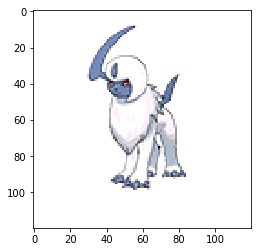

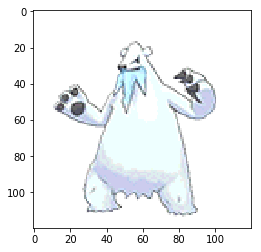

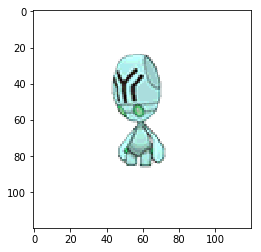

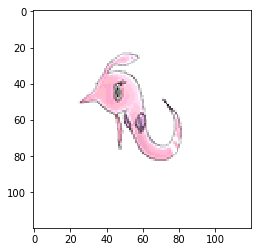

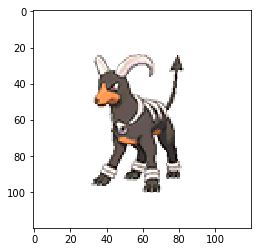

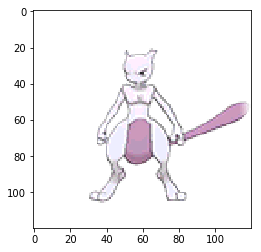

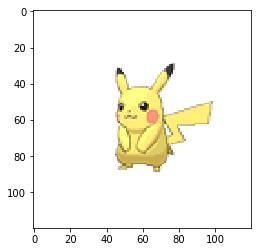

In [69]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import csv

from colormath.color_objects import sRGBColor, LabColor
from colormath.color_conversions import convert_color
from colormath.color_diff import delta_e_cie2000

file = open('data.csv', 'r')

pokemon = input("Select your favorite Pokemon ")

pokemonFound = []


reader = csv.reader(file, delimiter=',')

print("Searching the Pokemon")

for row in tqdm(reader):
    if(row[0][22:-4] == pokemon):
        pokemondata = row
        
file = open('data.csv', 'r')

reader = csv.reader(file, delimiter=',')
print("processing data")
for row in tqdm(reader):
    
    #check if the pokemon is not the same
    if(row[0][22:-4] == pokemon):
        continue
        
    else:
        #Search for the same first color
        FirstColor = sRGBColor(float(pokemondata[1]), float(pokemondata[2]), float(pokemondata[3]))
        iteratedColor = sRGBColor(float(row[1]), float(row[2]), float(row[3]))

        #Processing first color
        color1_lab = convert_color(FirstColor, LabColor)

        color2_lab = convert_color(iteratedColor, LabColor)

        delta_e = delta_e_cie2000(color1_lab, color2_lab);

        #Processing second color
        SecondColor = sRGBColor(float(pokemondata[5]), float(pokemondata[6]), float(pokemondata[7]))
        iteratedColor = sRGBColor(float(row[5]), float(row[6]), float(row[7]))

        color1_lab_1 = convert_color(SecondColor, LabColor)

        color2_lab_1 = convert_color(iteratedColor, LabColor)

        delta_e_2 = delta_e_cie2000(color1_lab_1, color2_lab_1);


        #Processing third color
        ThirdColor = sRGBColor(float(pokemondata[9]), float(pokemondata[10]), float(pokemondata[11]))
        iteratedColor2 = sRGBColor(float(row[9]), float(row[10]), float(row[11]))

        color1_lab_2 = convert_color(ThirdColor, LabColor)

        color2_lab_2 = convert_color(iteratedColor2, LabColor)

        delta_e_3 = delta_e_cie2000(color1_lab_2, color2_lab_2);
    
        coef_delta_e = 10
        
        print(row)
        
        if(((delta_e < coef_delta_e) and abs(int(row[13]) - int(pokemondata[13])) < 500)
          or ((delta_e_2 < coef_delta_e) and abs(int(row[13]) - int(pokemondata[13])) < 500)
        or ((delta_e_3 < coef_delta_e) and abs(int(row[13]) - int(pokemondata[13])) < 500)):
            pokemonFound.append(row[0])

print(len(pokemonFound))
        
plt.figure()
plt.imshow(mpimg.imread(pokemondata[0]))

        
for i in range(len(pokemonFound)):
    if(i<6):
        plt.figure()
        plt.imshow(mpimg.imread(pokemonFound[i]))
    

    